<br>
<br>
<font size='6'><u><b>The Fate of Our Galactic Neighborhood</b></u></font>
<br>

##### Written by Ekta Patel, U. Arizona (ektapatel@email.arizona.edu)
##### Simulation by Gurtina Besla, U. Arizona
##### Revised by Andres Jaramillo

In this notebook, we will explore the future fate of the Milky Way, Andromeda (M31), and the Triangulum (M33) galaxy. We will do so by analyzing a simulation of these galaxies where their current space motion is used to model their future orbital trajectories.

Please feel free to ask questions as we work through this activity together!
___

# Table of Contents

* [How to Use This Notebook](#How-to-Use-This-Notebook)
* [Pre-Activity Setup](#Pre-Activity-Setup)
* [Activity 1: Simulating the Motion of Galaxies](#Activity-1:-Simulating-the-Motion-of-Galaxies)
    * [Part 1.1: Milky Way Satellite Galaxies](#Part-1.1:-Milky-Way-Satellite-Galaxies)
    * [Part 1.2: The Andromeda Galaxy](#Part-1.2:-The-Andromeda-Galaxy)
* [Activity 2: The Future of the Milky Way and Andromeda](#Activity-2:-The-Future-of-the-Milky-Way-and-Andromeda)
    * [Part 2.1: The Orbital Trajectories of the Milky Way and Andromeda](#Part-2.1:-The-Orbital-Trajectories-of-the-Milky-Way-and-Andromeda)
    * [Part 2.2: Galaxy Collision](#Part-2.2:-Galaxy-Collision)
* [Activity 3: The Future Evolution of M33](#Activity-3:-The-Future-Evolution-of-M33)
    * [Part 3.1: M33 During the Collision](#Part-3.1:-M33-During-the-Collision)
    * [Part 3.2: Morphology of M33 over Time](#Part-3.2:-Morphology-of-M33-over-Time)
___

# How to Use This Notebook

The webpage you are in is actually an app - much like the ones on your cellphone. This app consists of cells.

An *input* cell looks like a light grey box with an `In [ ]:` on its left. Input cells each contain code - instructions to make the computer do something.

To activate or select a cell, click anywhere inside of it.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents.</b></font>
</div>

In [ ]:
# Text that follows a "#" is known as a comment.
# Comments do not affect your code in any way.
# You should always read the comments at the top of each cell you interact with.
# Comments will be used to describe what the cell's code is actually doing.

To execute or run a selected cell, hit `[Shift + Enter]` on your keyboard.

<div class='alert alert-info'>
    <font size='3'><b>Select the cell below and read its contents. Then, run the cell.</b></font>
</div>

In [ ]:
# Text that DOESN'T follow a "#" is considered code.
# Lines of code are instructions given to your computer.
# The line of code below is a "print" statement.
# A print statement literally prints out the text between its quotes.

print("Congrats! You have successfully run your first cell!")

Running a cell creates an *output* directly below it. An output can be some text, a graph, an interactive slider, or even nothing at all! For that last case, you know you have run a cell when the `In [ ]:` becomes `In [#]:`, where "#" is any number.

You can learn more about how Jupyter notebooks work at https://try.jupyter.org/
___

# Pre-Activity Setup

In order for any of the activities to work properly, you must import the libraries needed for the code in this notebook.

<div class='alert alert-info'>
    <font size='3'><b>Select and run the cell below.</b></font>
</div>

In [1]:
# Ignore this stuff - it is to setup the plotting envrionment in your browser
# Just hit Shift + Enter here, and move on
import requests
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as np
#from CenterOfMass import CenterOfMass
import astropy.units as u
from astropy.constants import G
from matplotlib.colors import LogNorm
from ipywidgets import *
from IPython.display import display, HTML
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Now we create a variable with the link to our repository
repoURL = 'https://raw.githubusercontent.com/DavidVargasMora/TACTests/master/'

from httpimport import remote_repo

with remote_repo(['CenterOfMass'], repoURL+'04_Galactic_Neighborhood') :
    from CenterOfMass import CenterOfMass

___

# Activity 1: Simulating the Motion of Galaxies

Snapshots of the sky taken using telescopes don't always provide enough information for us to understand how galaxies have been moving relative to one another in the past. Therefore, we have to use something called **proper motion** to get a sense of how a galaxy is moving. **Proper motion** is the measure of the amount a galaxy moves across the sky relative to some distant background object over time. The accuracy of these types of measurements for galaxies like Andromeda are about 10-30 micro-arcseconds per year, which is equivalent to roughly the rate of human hair growth at the distance of the Moon! In other words, these are very tiny movements!
___

## Part 1.1: Milky Way Satellite Galaxies

Let's explore the movement of some of the satellite galaxies orbiting around the Milky Way. The following plots show predicted orbits for Milky Way satellites during the last 2 billion years.

<div class='alert alert-info'>
    <h3 class='alert-heading'>Helpful Reminder(s)</h3>
    <ul>
        <li>Click anywhere inside of a cell to select it.</li>
        <li>Hit [Shift + Enter] to run a selected cell.</li>
    </ul>
</div>

In [ ]:
#Download the .mp4 file

url = repoURL+'04_Galactic_Neighborhood/Figures/classical_sats_ufds_font.mp4'
r = requests.get(url, allow_redirects=True, stream=True)
open('classical_sats_ufds_font.mp4', 'wb').write(r.content)

In [ ]:
# Display the .mp4
import io, base64
video = io.open('classical_sats_ufds_font.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
<video controls autoplay loop>
    <source src="data:video/mp4;base64,{0}" width="200" type="video/mp4">
</video>
<figcaption>
<br>
<b>Movie Credit:</b> Ekta Patel
</figcaption>
'''.format(encoded.decode('ascii')))

___

## Part 1.2: The Andromeda Galaxy

Let's move to the Andromeda galaxy - the closest galaxy to the Milky Way that has approximately the same mass. Andromeda is currently moving towards the Milky Way at a rate of 110 km/s. That's 246,063 miles/hr!

<figure>
    <center>
        <br>
        <img src='Figures/M31.jpg', width='800'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Image 1:</b>
                The Andromeda Galaxy.
                <br>
                <b>Image Credit:</b>
                Adam Evans
            </font>
        </figcaption>
    </center>
</figure>

<figure>
    <center>
        <br>
        <img src='Figures/pandas.jpg', width='800'>
        <br>
        <figcaption>
            <font color='grey'>
                <b>Image 2:</b>
                Andromeda also has many satellite galaxies. Their proper motions have not been measured yet, so we cannot predict their past orbital histories. The Andromeda Galaxy observed by the PAndAS survey.
                <br>
                <b>Image Credit:</b>
                Pan-Andromeda Archaeological Survey
            </font>
        </figcaption>
    </center>
</figure>

___

# Activity 2: The Future of the Milky Way and Andromeda

Let's start analyzing the simulation of the future Milky Way and Andromeda collision. The galaxies are represented by mass particles. The Milky Way is composed of about 67,500 particles in this simulation. M31 is composed of about 94,500 particles and M33 is represented by 14,300 particles.

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>Why do you think the galaxies are represented with different numbers of particles?</li>
    </ul>
</div>

___

## Part 2.1: The Orbital Trajectories of the Milky Way and Andromeda

The code below plots the particle-averaged orbits of the Milky Way and Andromeda. The plot on the top shows the separation between the galaxies as a function of future time. The plot on the bottom shows the relative velocity between the two galaxies as a function of time.

<div class='alert alert-info'>
    <h3 class='alert-heading'>Helpful Reminder(s)</h3>
    <ul>
        <li>Click anywhere inside of a cell to select it.</li>
        <li>Hit [Shift + Enter] to run a selected cell.</li>
    </ul>
</div>

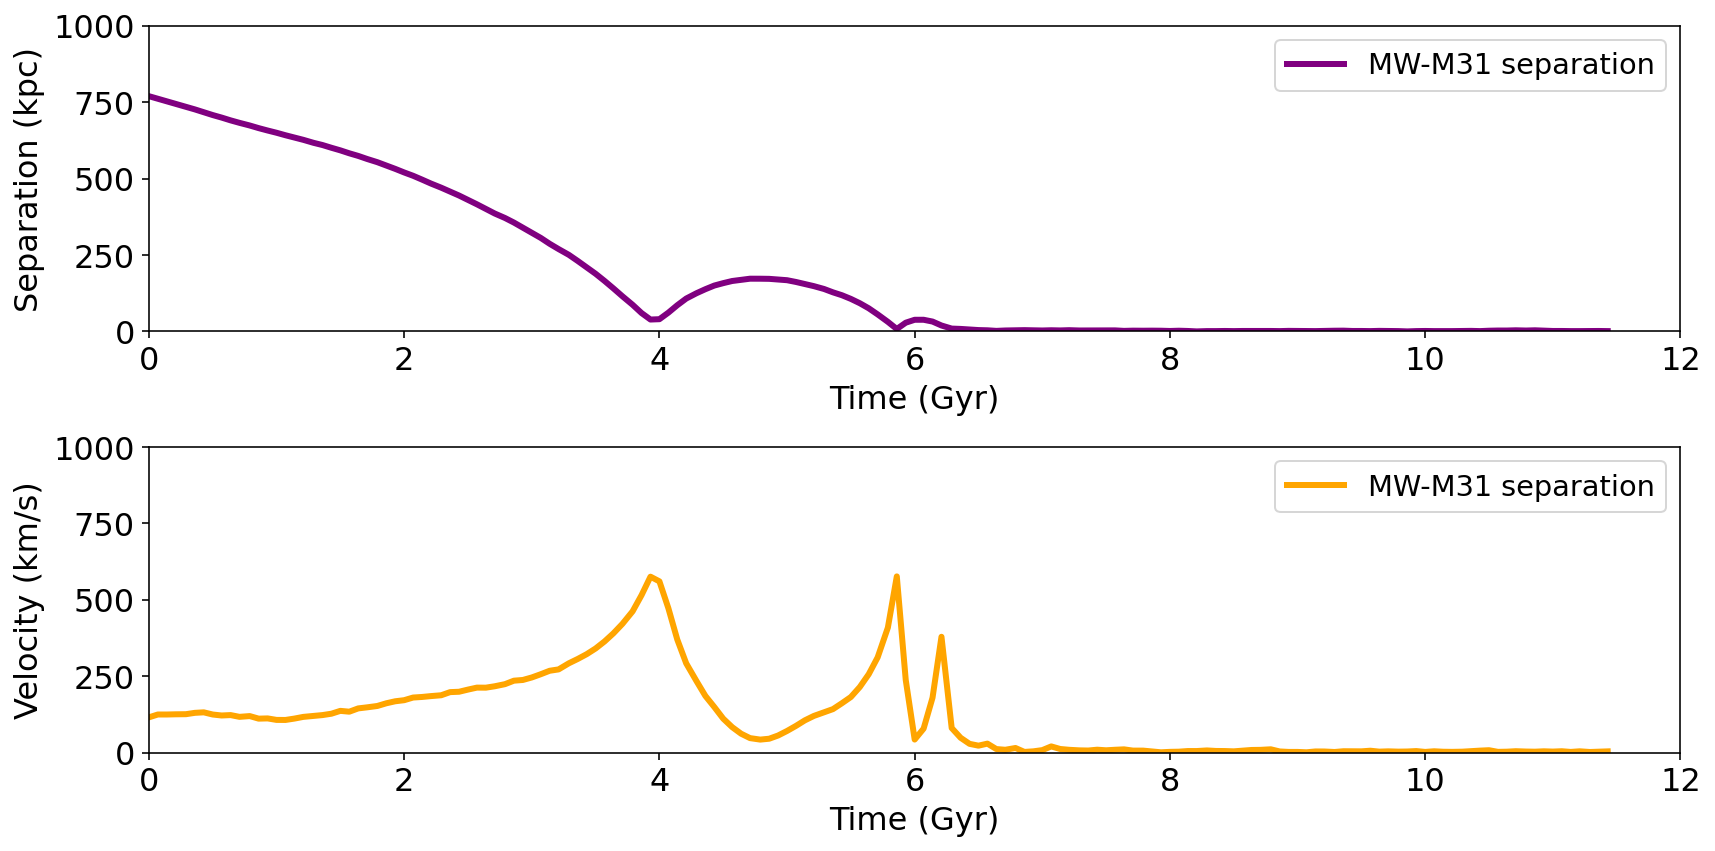

In [3]:
# This sets how many Gyr into the future we can see the orbits for. 0 Gyr = today 
# and 12 Gyr is the maximum.
mintime = 0. ## EDIT HERE!
maxtime = 12. ## EDIT HERE!

# This sets the upper limit on the separation between the galaxies.
max_sep = 1000 ## EDIT HERE!


####################################
### ignore everything below here ###

# headers:  t, x, y, z, vx, vy, vz
MWOrbit = np.genfromtxt(repoURL+'04_Galactic_Neighborhood/Data/Orbit_MW.txt',dtype=None,names=True) 
M31Orbit = np.genfromtxt(repoURL+'04_Galactic_Neighborhood/Data/Orbit_M31.txt',dtype=None,names=True) 
M33Orbit = np.genfromtxt(repoURL+'04_Galactic_Neighborhood/Data/Orbit_M33.txt',dtype=None,names=True)


# Determine the magnitude of the 
# relative position and velocities 
# of MW and M31

M31MWR = np.sqrt((MWOrbit['x']-M31Orbit['x'])**2 + (MWOrbit['y']-M31Orbit['y'])**2 
                 +(MWOrbit['z']-M31Orbit['z'])**2) 
M31MWV = np.sqrt((MWOrbit['vx']-M31Orbit['vx'])**2 + (MWOrbit['vy']-M31Orbit['vy'])**2 
                 +(MWOrbit['vz']-M31Orbit['vz'])**2) 

# of M33 and M31
M33M31R = np.sqrt((M31Orbit['x']-M33Orbit['x'])**2 + (M31Orbit['y']-M33Orbit['y'])**2 
                 +(M31Orbit['z']-M33Orbit['z'])**2) 
M33M31V = np.sqrt((M31Orbit['vx']-M33Orbit['vx'])**2 + (M31Orbit['vy']-M33Orbit['vy'])**2 
                 +(M31Orbit['vz']-M33Orbit['vz'])**2)

# of MW and M33
MWM33R = np.sqrt((MWOrbit['x']-M33Orbit['x'])**2 + (MWOrbit['y']-M33Orbit['y'])**2 
                 +(MWOrbit['z']-M33Orbit['z'])**2) 
MWM33V = np.sqrt((MWOrbit['vx']-M33Orbit['vx'])**2 + (MWOrbit['vy']-M33Orbit['vy'])**2 
                 +(MWOrbit['vz']-M33Orbit['vz'])**2)


plt.figure(figsize=(12,6))
label_size = 16
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Plot 1 - Left 
ax = plt.subplot(211)

plt.plot(MWOrbit['t'], M31MWR, lw=3, color='purple', label='MW-M31 separation')

plt.xlabel('Time (Gyr)', fontsize=16)
plt.ylabel('Separation (kpc)', fontsize=16)

ax.set_xlim(mintime, maxtime)
ax.set_ylim(0, max_sep)

plt.legend(loc='upper right',fontsize='x-large')

# Plot 2 - Right
ax2 = plt.subplot(212)

plt.plot(MWOrbit['t'], M31MWV, lw=3, color='orange', label='MW-M31 separation')

ax2.set_xlim(mintime, maxtime)
ax2.set_ylim(0, max_sep)

plt.xlabel('Time (Gyr)', fontsize=16)
plt.ylabel('Velocity (km/s)', fontsize=16)

plt.legend(loc='upper right',fontsize='x-large')
plt.tight_layout()

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>When will the Milky Way and Andromeda (M31) first collide? Hint: What do the dips and the peaks in each plot above represent?</li>
        <li>How many times will the two galaxies interact before they completely merge? When will that happen?</li>
    </ul>
</div>

You may need to zoom in on the plots above by changing the quantities labeled `mintime`, `maxtime` and `max_sep` at the beginning of the cell above.
___

## Part 2.2: Galaxy Collision

What will the galaxies look like when they first collide?<br>
Run the cell below to see what the galaxies look like at the start of the simulation **(snap=0)**, which corresponds to today.

In [ ]:
####################################
### ignore everything below here ###

#imports all the data for the x,y,z positions of the particles
df_M31 = pd.read_csv(repoURL+"04_Galactic_Neighborhood/Data/M31_xyz_data.csv")
df_MW = pd.read_csv(repoURL+"04_Galactic_Neighborhood/Data/MW_xyz_data.csv")

def plotting_double(snap):
    
    if(snap % 10 != 0):
      #If snap is not divisible by 10, we make it so...
      if(snap % 10 >= 5):
        snap = int(snap / 10) * 10 + 10
      else: 
        snap = int(snap / 10) * 10
        
    thissnap = '000' + str(int(snap))                       
    thissnap = thissnap[-3:]
    
    xD = np.array(df_MW.loc[lambda df: df_MW.snap == snap, "X"])
    yD = np.array(df_MW.loc[lambda df: df_MW.snap == snap, "Y"])
    xD2 = np.array(df_M31.loc[lambda df: df_M31.snap == snap, "X"])
    yD2 = np.array(df_M31.loc[lambda df: df_M31.snap == snap, "Y"])
    
    fig = plt.figure(figsize=(12,6))

    ax = plt.subplot(121)

    ax.hist2d(xD, yD, bins=400, norm=LogNorm(), cmap='magma')

    # Add axis labels
    ax.set_xlabel('x (kpc)', fontsize=22)
    ax.set_ylabel('y (kpc)', fontsize=22)

    box = 100.
    #set axis limits
    ax.set_ylim(-box,box)
    ax.set_xlim(-box,box)
    plt.figtext(0.15, 0.85, 'MW',fontsize=22)
    
    ax2 = plt.subplot(122)
    ax2.hist2d(xD2, yD2, bins=400, norm=LogNorm(), cmap='magma')

    # Add axis labels
    ax2.set_xlabel('x (kpc)', fontsize=22)
    ax2.set_ylabel('y (kpc)', fontsize=22)

    #set axis limits
    ax2.set_ylim(-box,box)
    ax2.set_xlim(-box,box)
    plt.figtext(0.9, 0.85, 'M31',fontsize=22)

    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.suptitle('snap = %s, time = %s Gyr'%(snap, round(int(thissnap)*14.287/1000,2)), fontsize=22, color='blue')
    plt.show()

interactive_plot_1 = interactive(plotting_double, snap=IntSlider(min=0, max=800, step=10, continuous_update=False))
display(interactive_plot_1)

Now go to the top of the plot above and move the slider labeled *'snap'* to see what the galaxies will look like at future points in the orbit.
<br>
Each **"snap"** or "snapshot" corresponds to about 14 million years in the future.
___

# Activity 3: The Future Evolution of M33

What happens to M33 during the Milky Way and Andromeda collision? It started off as a satellite galaxy of Andromeda.
___

## Part 3.1: M33 During the Collision

The following piece of code will plot the trajectories of M33-MW and M33-M31 until 6.5 Gyr into the future.

<div class='alert alert-info'>
    <h3 class='alert-heading'>Helpful Reminder(s)</h3>
    <ul>
        <li>Click anywhere inside of a cell to select it.</li>
        <li>Hit [Shift + Enter] to run a selected cell.</li>
    </ul>
</div>

In [ ]:
time = 7 ## EDIT HERE!

####################################
### ignore everything below this ###
plt.figure(figsize=(12,6))
# Plot 1
ax = plt.subplot(111)
plt.plot(M33Orbit['t'], MWM33R, lw=5, color='blue', label='separation between MW-M33')
plt.plot(M33Orbit['t'], M33M31R, lw=3, color='limegreen', label='separation between M31-M33')

plt.xlabel('Time (Gyr)', fontsize=18)
plt.ylabel('Separation (kpc)', fontsize=18)

label_size = 16
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.legend(loc='upper right',fontsize='x-large')
plt.xlim(0, time)
ax.set_rasterized(True)

plt.tight_layout()

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>Will M33 collide with either the Milky Way, Andromeda, or the merged galaxy?</li>
    </ul>
</div>

Edit the line that says 'time = ' in the cell above to anything between 0 and 12 to see the future orbit of M33.
___

## Part 3.2: Morphology of M33 over Time

The cell below shows you what M33 looks like at the start of the simulation.

In [ ]:
### ignore everything below here ### 
particle_type = 1 

def single_plotting(snap, particle_type):
    
    if(snap % 10 != 0):
      #If snap is not divisible by 10, we make it so...
      if(snap % 10 >= 5):
        snap = int(snap / 10) * 10 + 10
      else: 
        snap = int(snap / 10) * 10
    
    thissnap = '000' + str(int(snap))                       
    thissnap = thissnap[-3:]  

    ## M33
    
    url = repoURL+"04_Galactic_Neighborhood/Data/Sims/M33_VLowRes/M33_%s.txt"%thissnap
    r = requests.get(url, allow_redirects=True, stream=True)
    open('M33_%s.txt'%thissnap, 'wb').write(r.content)
    ## M33
    COMD3 = CenterOfMass('M33_%s.txt'%thissnap,particle_type)
    COMP3 = [-475. * u.kpc, 490. * u.kpc, -415 * u.kpc]#COMD3.COM_P(0.1, 4.0)
    COMV3 = COMD3.COM_V(COMP3[0],COMP3[1],COMP3[2])

    # Determine positions and velocities of disk particles relative to COM motion
    xD3 = COMD3.x - float(COMP3[0]/u.kpc)
    yD3 = COMD3.y - float(COMP3[1]/u.kpc)
    zD3 = COMD3.z - float(COMP3[2]/u.kpc)

    plt.figure(figsize=(8,8))
    plt.title('snap = %s, time = %s Gyr'%(snap, round(int(thissnap)*14.287/1000,2)), fontsize=22, color='blue')
    

    plt.hist2d(xD3, yD3, bins=300, norm=LogNorm(), cmap='magma')

    # Add axis labels
    plt.xlabel('x (kpc)', fontsize=22)
    plt.ylabel('y (kpc)', fontsize=22)
    plt.figtext(1., 0.5, 'particle_type: \n 1 = dark matter particles \n 2 = star particles', fontsize=22)
    plt.figtext(0.15, 0.82, 'M33', fontsize=22)
    
    if particle_type == 1:
        plt.figtext(0.65, 0.82, 'Dark Matter', color='red', fontsize=22)
        
    if particle_type == 2:
        plt.figtext(0.65, 0.82, 'Stars', color='red', fontsize=22)
        
    plt.show()

interactive_plot_2 = interactive(single_plotting, snap=IntSlider(min=0, max=800, step=10, value=0, continuous_update=False), particle_type = ToggleButtons(options={'Dark Matter':1, 'Stars':2}))
display(interactive_plot_2)

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>How does M33's morphology change over time?</li>
    </ul>
</div>

Go to the top of the plot above and move the slider labeled 'snap' to see what M33 will look like at future points in the orbit.

<div class='alert alert-success'>
    <h3 class='alert-heading'>Quick Question(s)</h3>
    <ul>
        <li>Do the stars and the dark matter particles have the same shape? What about how far the stars vs. dark matter particles extend in size (hint: how do the limits of the x and y axis change)?</li>
    </ul>
</div>

___